# Data Exploration and Preprocessing

#### 1) Exploring the dataset and identify the number of rows and columns.Checking for missing values in each column and handling them accordingly.
#### 2) Performing data type conversion if necessary.Analyzing the distribution of the target variable("Aggregate rating") and identify any class imbalances.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Loading the dataset
df = pd.read_csv('Dataset .csv')


In [3]:
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Displaying the number of rows and columns
num_rows, num_cols = df.shape

In [5]:
df.shape

(9551, 21)

In [6]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# Analyzing the distribution of the target variable
target_distribution = df['Aggregate rating'].value_counts()
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

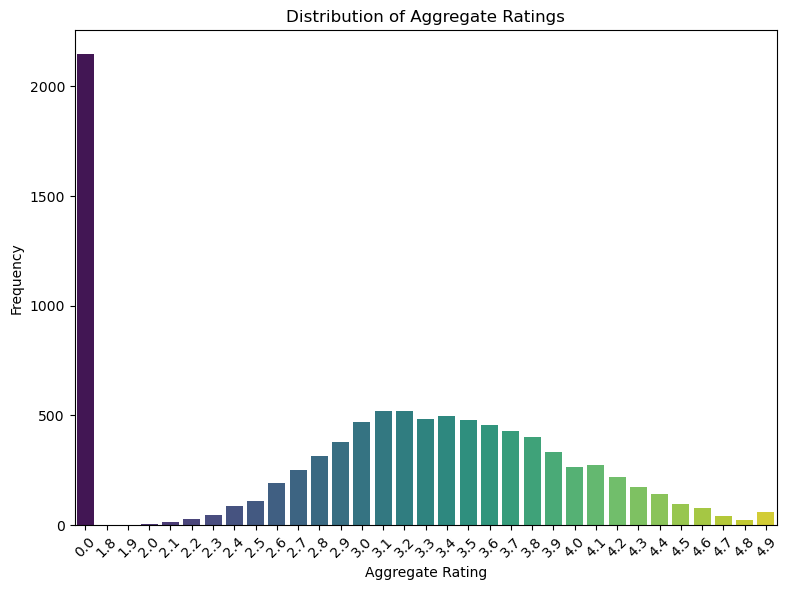

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


In [9]:
# Handling missing values in the 'Cuisines' column 
df.dropna(subset=['Cuisines'], inplace=True)


In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Descriptive Analysis

#### 1) Calculating basic statistical measures (mean,median, standard deviation, etc.) for numerical columns.
#### 2) Exploring the distribution of categorical variables like "Country Code," "City," and"Cuisines". Identifying the top cuisines and cities with the highest number of restaurants.

In [12]:
# Separating numerical and Categorical Featurs
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')
Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [13]:
# Calculating mean,median, standard deviation
stats = df[num_cols].describe()
stats

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


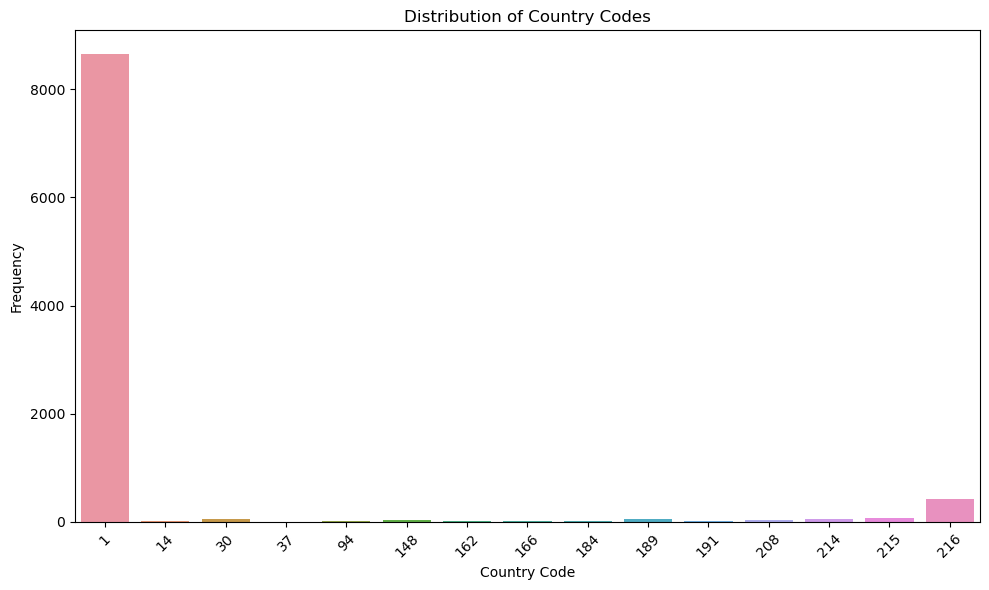

In [15]:
# Exploring the distribution of 'Country Code'
plt.figure(figsize=(10, 6))
sns.countplot(x='Country Code', data=df)
plt.title('Distribution of Country Codes')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


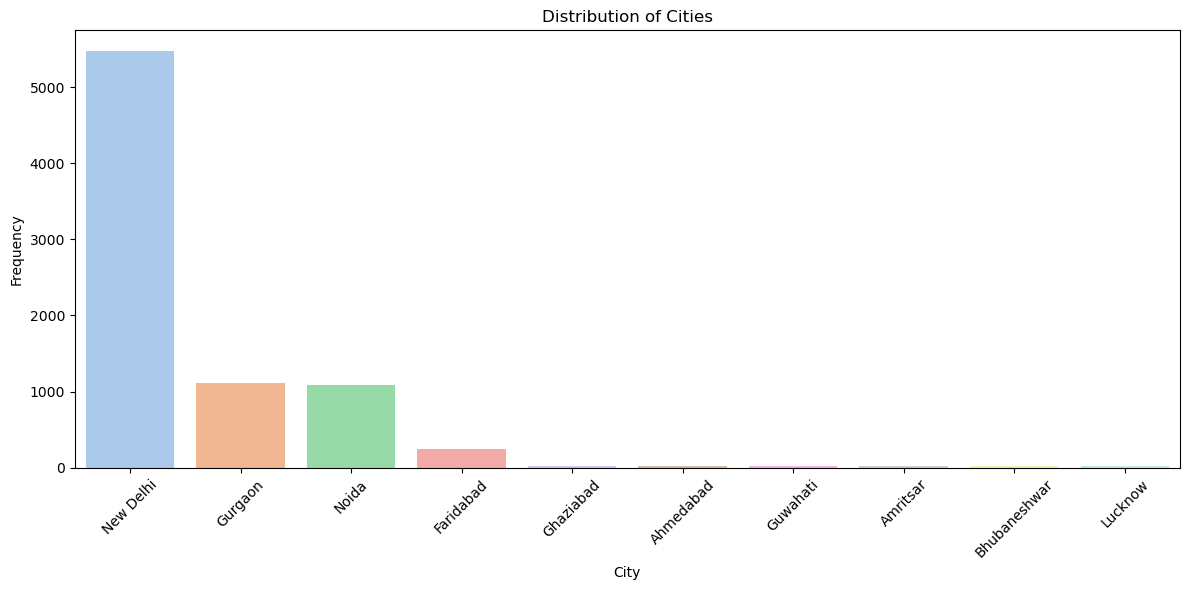

In [16]:
# Exploring the distribution of 'City'
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=df, palette='pastel', order=df['City'].value_counts().iloc[:10].index)
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


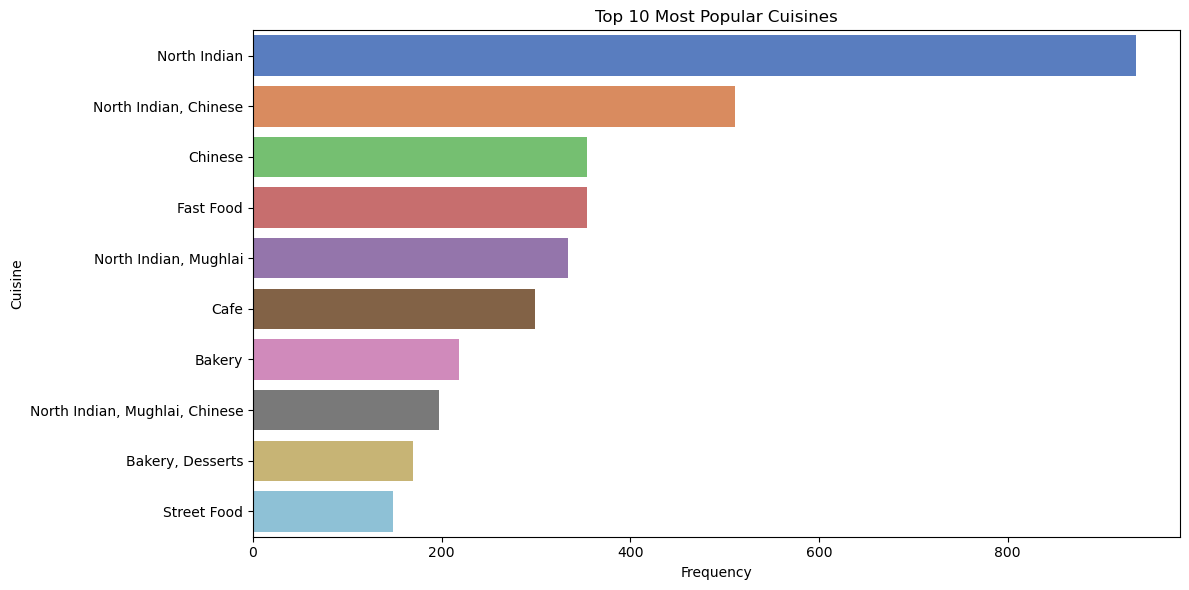

In [17]:
# Exploring the distribution of 'Cuisines'
plt.figure(figsize=(12, 6))
sns.countplot(y='Cuisines', data=df, palette='muted', order=df['Cuisines'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

In [18]:
top_cuisines = df['Cuisines'].value_counts().head()

In [19]:
top_cuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [20]:
top_cities = df['City'].value_counts().head()
top_cities

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

## Geospatial Analysis

#### 1)Visualize the locations of restaurants on a map using latitude and longitude information.
#### 2)Analyzinge distribution of restaurants cross different cities or countries.Determine if there is any correlation etween the restaurant's location and its rating.

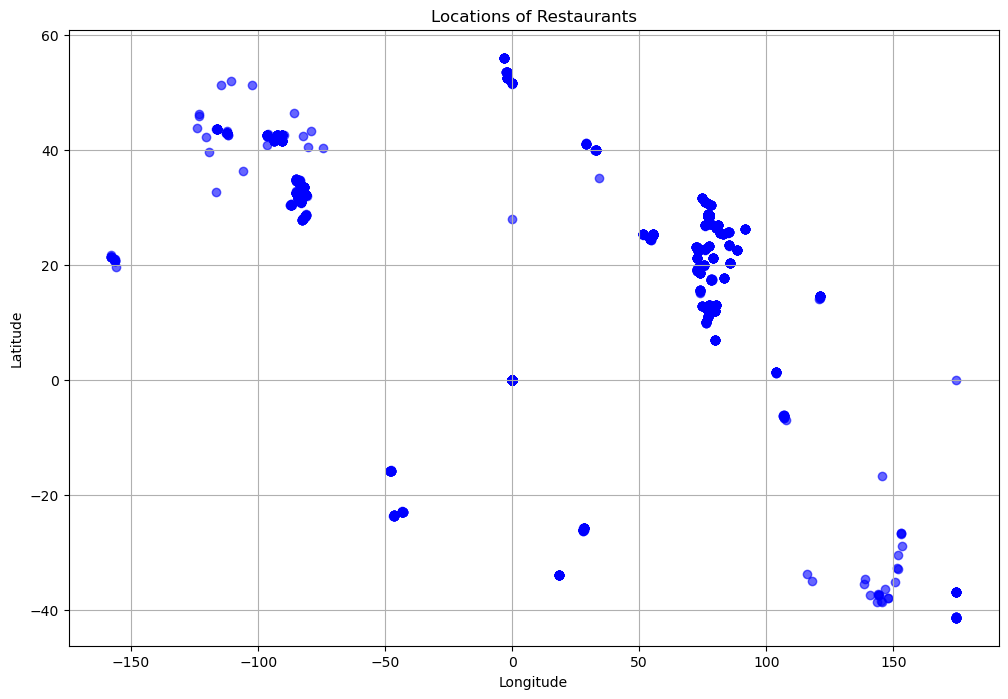

In [21]:
# Visualizing the locations of restaurants on a map
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], color='blue', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of Restaurants')
plt.grid(True)
plt.show()

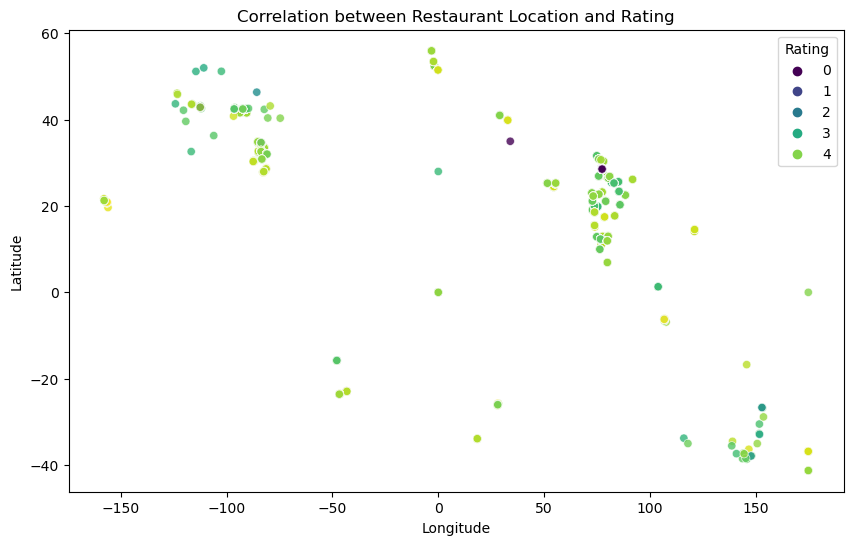

In [22]:
# Analyzing the correlation between restaurant location (latitude and longitude) and its rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df, palette='viridis', alpha=0.8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Correlation between Restaurant Location and Rating')
plt.legend(title='Rating')
plt.show()

## Table Booking and Online Delivery

#### 1)Determining the percentage of restaurants that offer table booking and online delivery.
#### 2)Comparing the average ratings of restaurantswith table booking and those without.
#### 3)Analyzing the availability of online delivery among restaurants with different price ranges.

In [23]:
total_restaurants = len(df)
table_booking_count = df['Has Table booking'].value_counts().get('Yes', 0)
online_delivery_count = df['Has Online delivery'].value_counts().get('Yes', 0)

In [24]:
table_booking_count

1158

In [25]:
online_delivery_count

2451

In [26]:
table_booking_percentage = (table_booking_count / total_restaurants) * 100
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

In [27]:
table_booking_percentage

12.135820582687067

In [28]:
online_delivery_percentage

25.686438901697755

In [29]:
average_rating_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

In [30]:
average_rating_with_table_booking

3.4419689119170984

In [31]:
average_rating_without_table_booking

2.557955629770992

##  Price Range Analysis

#### 1)Determining the most common price range among all the restaurants.
#### 2)Calculating the average rating for each price range.
#### 3)Identify the color that represents the highest average rating among different price ranges.

In [32]:
#Determine the most common price range
most_common_price_range = df['Price range'].mode()[0]
most_common_price_range

1

In [64]:
# Calculating the average rating for each price range
average_rating_per_price_range = df.groupby('Price range')['Aggregate rating'].mean()
average_rating_per_price_range

Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64

In [66]:
# Identifying the color that represents the highest average rating among different price ranges
highest_avg_rating_color = average_rating_per_price_range.idxmax()
highest_avg_rating_color

4

## Feature Engineering


#### 1)Extracting additional features from the existing columns, such as the length of the restaurant name or address.
#### 2)Creating new features like "Has Table Booking"or "Has Online Delivery" by encoding categorical variables.


In [35]:
#Extracting additional features
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

In [36]:
# Creating new features by encoding categorical variables
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [37]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


## Customer Preference Analysis

#### 1)Analyzing the relationship between the type of cuisine and the restaurant's rating.
#### 2)Identifying the most popular cuisines among customers based on the number of votes.
#### 3)Determining if there are any specific cuisines that tend to receive higher ratings.


In [44]:
# Analyzing the relationship between cuisine type and restaurant rating
df['Cuisines'] = df['Cuisines'].str.split(', ')
df_exploded = df.explode('Cuisines')
cuisine_rating = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

print(cuisine_rating.head(10))

Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


In [46]:
# Identifying the most popular cuisines based on votes
cuisine_votes = df_exploded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print(cuisine_votes.head(10))

Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


## : Data Visualization


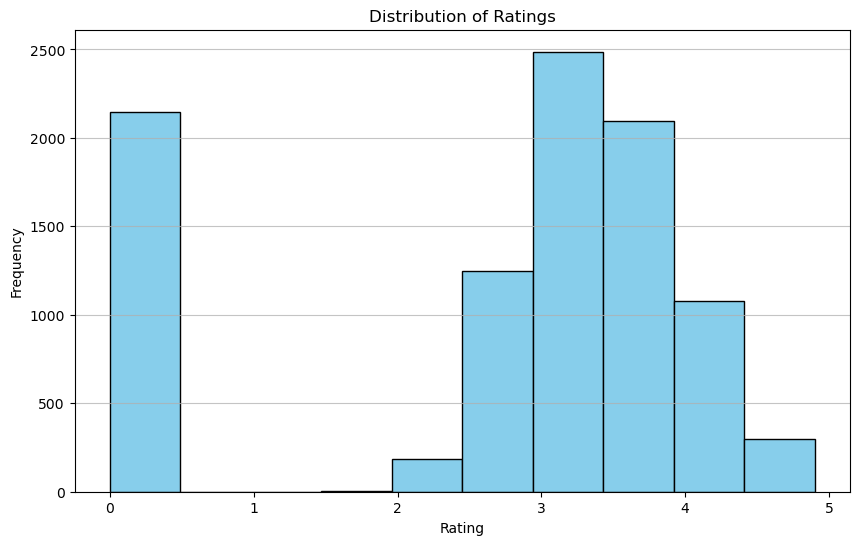

In [47]:
# Creating a histogram to represent the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

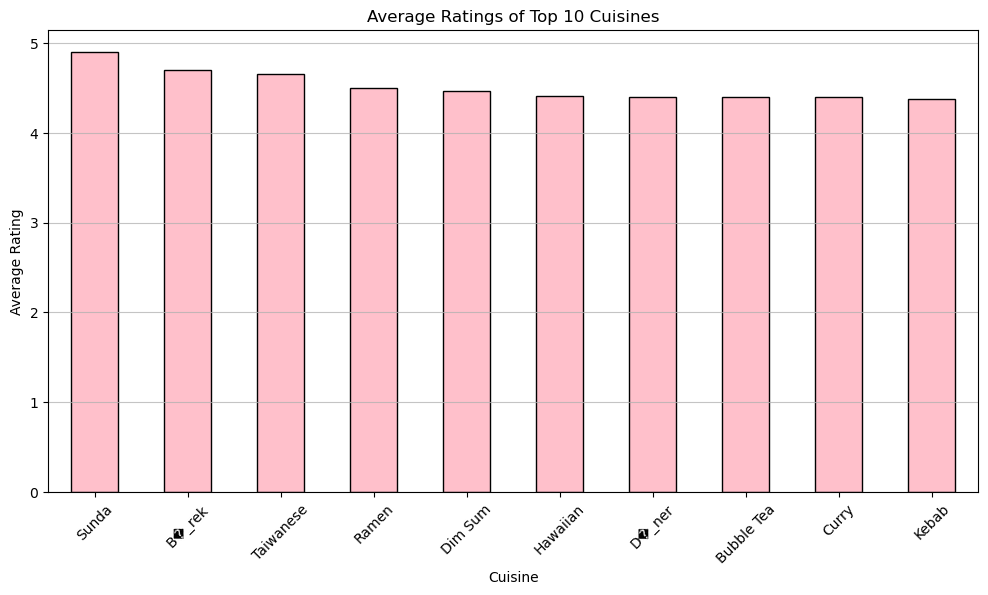

In [54]:
df_exploded = df.explode('Cuisines')

# Converting the 'Cuisines' column to strings
df_exploded['Cuisines'] = df_exploded['Cuisines'].astype(str)

# Group by 'Cuisines' and calculating the mean of 'Aggregate rating'
mean_ratings = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
mean_ratings[:10].plot(kind='bar', color='pink',edgecolor="black")
plt.title('Average Ratings of Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


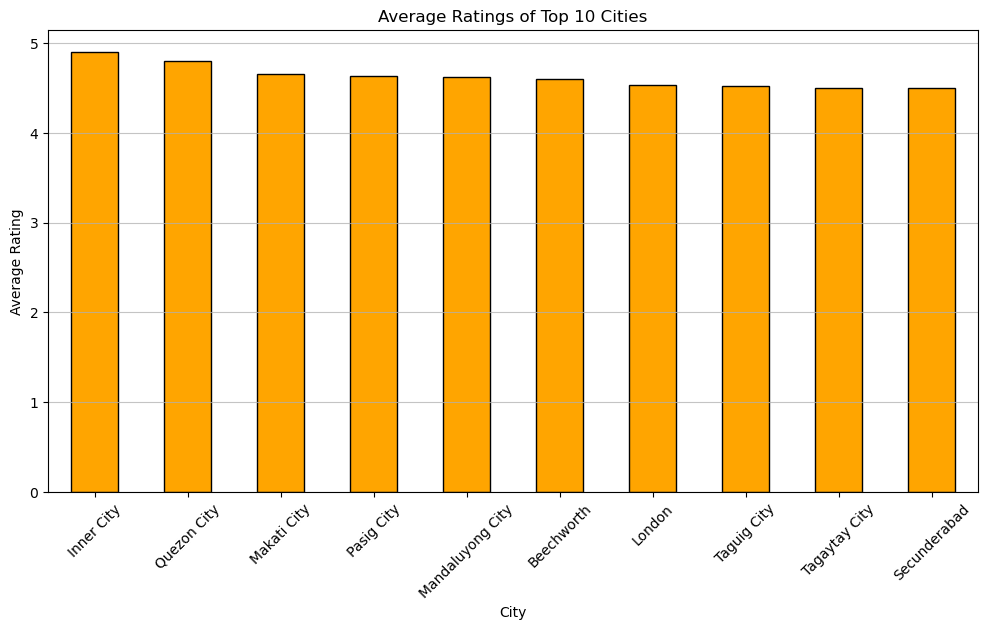

In [59]:
# Comparing the average ratings of different cities
plt.figure(figsize=(12, 6))
mean_ratings_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
mean_ratings_city[:10].plot(kind='bar', color='orange',edgecolor="black")
plt.title('Average Ratings of Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()